In [1]:
# Importing Libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import numpy
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = [12, 7]

In [3]:
sns.set()

In [4]:
df = pd.read_csv('../enc_devs_py_2021_fixed.csv')

In [5]:
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

In [6]:
# Light
color_hombres_light = (12/255, 50/255, 196/255, 0.5)
color_mujeres_light = (255/255, 192/255, 203/255, 0.5)
color_neutro_light = (149/255, 165/255, 166/255, 0.5)
# Dark
color_hombres_dark = (12/255, 50/255, 196/255, 0.8)
color_mujeres_dark = (255/255, 192/255, 203/255, 0.8)
color_neutro_dark = (149/255, 165/255, 166/255, 0.8)

# HELPER FUNCTIONS 

In [43]:
def split_row(row):
    if(isinstance(row, str)):
        return(row.split(';'))

In [44]:
def make_df(df, col):
    cats = {}
    for i in col.map(split_row):
        for j in i:
            cats[j]=0
    for i in col.map(split_row):
        for j in i:
            cats[j]+=1
    df = pd.DataFrame(data = [i for i in cats.items()], columns=['cat', 'count']).set_index('cat')
    return(df)

# SUELDOS
- Sueldos percibidos por los devs que contestaron las preguntas.

## SEGUN GENERO

In [45]:
genero = df.groupby('género')

In [46]:
df['género'].value_counts().keys()

Index(['HOMBRE', 'MUJER', 'NO COMPARTO'], dtype='object')

### HOMBRES

In [47]:
genero.get_group('HOMBRE')['salario_mensual'].value_counts()

5.000.000 a 7.000.000 Gs.       48
7.000.000 a 9.000.000 Gs.       41
9.000.000 a 12.000.000 Gs.      37
3.500.000 a 5.000.000 Gs.       37
2.192.839 gs a 3.500.000 Gs.    31
12.000.000 a 15.000.000 Gs.     23
> 27.000.000 Gs.                13
15.000.000 a 18.000.000 Gs.     13
< 2.192.839 Gs.                 13
21.000.000 a 24.000.000 Gs.      7
2.192.839 Gs.                    6
18.000.000 a 21.000.000 Gs.      6
24.000.000 a 27.000.000 Gs.      4
Name: salario_mensual, dtype: int64

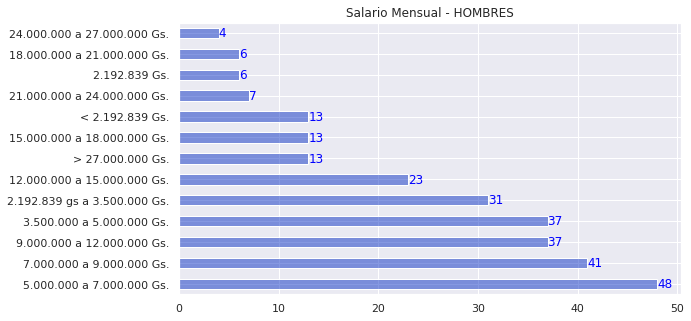

In [183]:
fig = plt.figure(figsize=(9,5))
ax1 = plt.subplot(111)

rects = genero.get_group('HOMBRE')['salario_mensual'].value_counts(normalize=False).plot(
    kind='barh',
    title='Salario Mensual - HOMBRES',
    color=color_hombres_light
    )

 
for k,v in enumerate(genero.get_group('HOMBRE')['salario_mensual'].value_counts(normalize=False).values):
       rects.annotate(v,(v,k),  va='center',color='blue')
plt.show()


### MUJERES

In [184]:
genero.get_group('MUJER')['salario_mensual'].value_counts()

5.000.000 a 7.000.000 Gs.       12
7.000.000 a 9.000.000 Gs.        8
9.000.000 a 12.000.000 Gs.       7
2.192.839 gs a 3.500.000 Gs.     7
3.500.000 a 5.000.000 Gs.        7
12.000.000 a 15.000.000 Gs.      3
> 27.000.000 Gs.                 2
2.192.839 Gs.                    2
18.000.000 a 21.000.000 Gs.      1
Name: salario_mensual, dtype: int64

In [185]:
genero.get_group('MUJER')['salario_mensual'].value_counts(normalize=False).values

array([12,  8,  7,  7,  7,  3,  2,  2,  1])

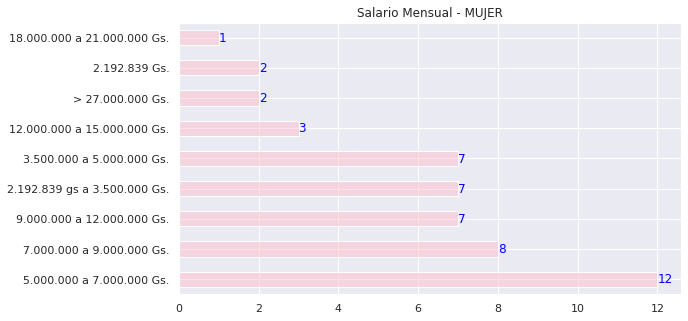

In [186]:
fig = plt.figure(figsize=(9,5))
ax1 = plt.subplot(111)

ret = genero.get_group('MUJER')['salario_mensual'].value_counts(normalize=False).plot(
    kind='barh',
    title='Salario Mensual - MUJER',
    color=color_mujeres_light,
   
    
) 
for k,v in enumerate(genero.get_group('MUJER')['salario_mensual'].value_counts(normalize=False).values):
       ret.annotate(v,(v,k),  va='center',color='blue')
plt.show()


### NO DEFINIDO

In [187]:
genero.get_group('NO COMPARTO')['salario_mensual'].value_counts()

3.500.000 a 5.000.000 Gs.       1
12.000.000 a 15.000.000 Gs.     1
5.000.000 a 7.000.000 Gs.       1
18.000.000 a 21.000.000 Gs.     1
2.192.839 gs a 3.500.000 Gs.    1
> 27.000.000 Gs.                1
Name: salario_mensual, dtype: int64

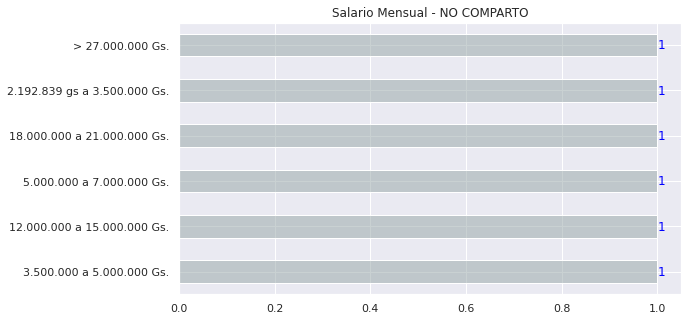

In [191]:
fig = plt.figure(figsize=(9,5))
ax1 = plt.subplot(111)

nc = genero.get_group('NO COMPARTO')['salario_mensual'].value_counts(normalize=False).plot(
    kind='barh',
    title='Salario Mensual - NO COMPARTO',
    color=color_neutro_light, 

    )


for k,v in enumerate(genero.get_group('NO COMPARTO')['salario_mensual'].value_counts(normalize=False).values):
       nc.annotate(v,(v,k),  va='center',color='blue')
plt.show()


### GENERO HOMBRES VS MUJERES

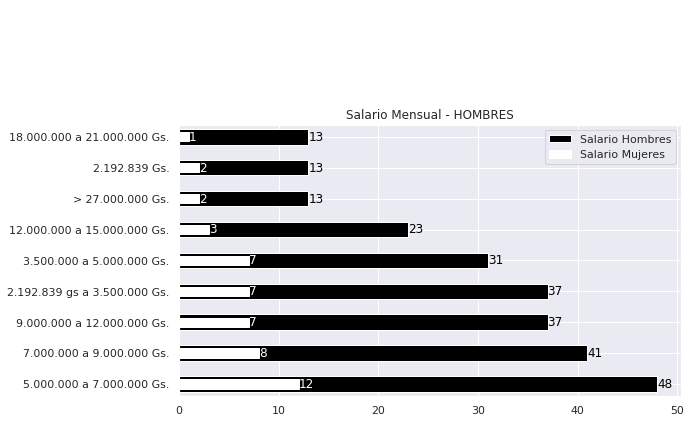

In [201]:
fig = plt.figure(figsize=(9,5))
ax1 = plt.subplot(111)

h = genero.get_group('HOMBRE')['salario_mensual'].value_counts(normalize=False).plot(
    kind='barh',
    title='Salario Mensual - HOMBRES',
    color='black',
    label='Salario Hombres'
    )

for k,v in enumerate(genero.get_group('HOMBRE')['salario_mensual'].value_counts(normalize=False).values):
       h.annotate(v,(v,k),  va='center',color='black')
        
        
m = genero.get_group('MUJER')['salario_mensual'].value_counts(normalize=False).plot(
    kind='barh',
    title='Salario Mensual - HOMBRES',
    color='white',
    width=.3,
       label='Salario Mujeres'
    )

for k,v in enumerate(genero.get_group('MUJER')['salario_mensual'].value_counts(normalize=False).values):
       m.annotate(v,(v,k),  va='center',color='white')
        
        
plt.legend()
plt.title = 'SALARIO HOMBRES Y MUJERES'
plt.show()

### SALARIO  SEGUN experiencia_en_ti 

In [61]:
exp = df.groupby('experiencia_en_ti')

In [66]:
exp.groups.keys()

dict_keys(['10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '45-49', '5-9', '<5', '>50'])


### educación
### carreras_o_especialidades

